In [1]:
import sympy
from sympy import Ellipse, Point, Line, S, Eq, latex, plot_implicit
from sympy import symbols, simplify, Rational, solve
from IPython.display import Latex

# Практическое занятие 14
# Компьютерный практикум по алгебре на Python
### Задание 1.
Построить эллипс с центром в точке А(1, 2), полуосями 3 и 2. Вычислить и вывести на экран эксцентриситет, площадь и длину дуги полученного эллипса, центр, полуоси, periapsis, apoapsis, межфокусное расстояние и фокусы.

In [2]:
Ellipse1 = Ellipse(Point(1, 2), hradius=3,  vradius=2)
props = {'center': Ellipse1.center,
         'hradius': Ellipse1.hradius,
         'vradius': Ellipse1.vradius,
         'area': Ellipse1.area,
         'circumference': Ellipse1.circumference,
         'eccentricity': Ellipse1.eccentricity,
         'periapsis': Ellipse1.periapsis,
         'apoapsis': Ellipse1.apoapsis,
         'focus\_distance': Ellipse1.focus_distance,
         'foci': Ellipse1.foci}
display(*[Latex(f'{key} = {latex(props[key])}') for key in props])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 2.
Вывести на экран **уравнение** эллипса из задания 1, повернутого на 30 градусов против часовой стрелки относительно его центра,  переменные $u$ и $v$.

Изобразить на общем графике эллипс и повернутый эллипс.

Eq(9*(-2*u/3 + v - 4/3)**2/52 + (u + 2*v/3 - 7/3)**2/13, 1)

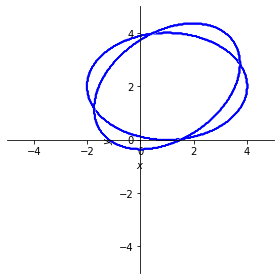

In [3]:
expr2 = Ellipse1.equation(x='u', y='v', _slope=1/(3**S(1)/2))
eq2 = Eq(expr2, 0)
right_slope_side = -expr2.as_coeff_add()[0]
eq2_new = Eq(expr2 + right_slope_side, right_slope_side)
display(eq2_new)

p = plot_implicit(Ellipse1.equation(x='x', y='y'),
                  aspect_ratio=(1, 1),
                  show=False,
                  adaptive=False)
p.extend(plot_implicit(expr2,
                aspect_ratio=(1, 1),
                show=False,
                adaptive=False))
p.show()

### Задание 3.
Найти вершины эллипса из Задания 1.

Указание: вершины эллипса искать как решение системы уравнений, составленной из уравнения эллипса и уравнения прямой, проходящей через форкусы (воспользоваться Line и методом equation()); вторую пару вершин получить как решение системы из уравнения эллипса и прямой, проходящей через центр эллипса перпендикулярно прямой, проходящей через фокусы. 

In [4]:
line1 = Line(*Ellipse1.foci)
x, y = symbols("x y")
eq_line1 = line1.equation(x=x, y=y)
eq_ell1 = Ellipse1.equation(x=x, y=y)
y_eq1 = sympy.solve(eq_line1, y)[0]
x_1 = sympy.solve(sympy.expand(eq_ell1).subs(y, y_eq1), x)
line2 = line1.perpendicular_line(Ellipse1.center)
eq_line2 = line2.equation(x=x, y=y)
x_eq2 = sympy.solve(eq_line2, x)[0]
y_2 = sympy.solve(sympy.expand(eq_ell1).subs(x, x_eq2), y)
points = [Point(x_1[0], y_eq1.subs(x, x_1[0])), Point(x_eq2.subs(y, y_2[0]), y_2[0]), Point(x_1[1], y_eq1.subs(x, x_1[1])), Point(x_eq2.subs(y, y_2[1]), y_2[1])]
points

[Point2D(-2, 2), Point2D(1, 0), Point2D(4, 2), Point2D(1, 4)]

### Задание 4*.
Провести касательные к эллипсу из Задания 1 через его вершины.

Указание: использовать equation прямых Line, plot_implicit. Для корректного изображения на графике горизонтальных прямых в plot_implicit указывать диапазоны значений и переменной $x$ и переменной $y$.

Eq(x + 2, 0)

Eq(y, 0)

Eq(x - 4, 0)

Eq(y - 4, 0)

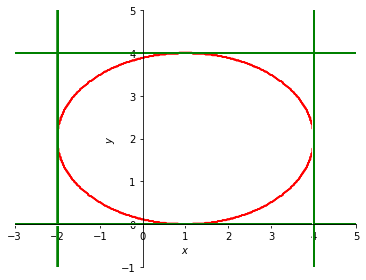

In [5]:
p = plot_implicit(Ellipse1.equation(x=x, y=y),
                  (x, -3, 5),
                  (y, -1, 5),
                  aspect_ratio=(1, 1),
                  line_color = 'r',
                  show=False,
                  adaptive=False)
center = Ellipse1.center
for point in points:
    line2 = Line(point, center).perpendicular_line(point)
    display(Eq(line2.equation(x=x,y=y), 0))
    p.extend(plot_implicit(line2.equation(x=x, y=y),
                (x, -3, 5),
                (y, -1, 5),
                aspect_ratio=(1, 1),
                line_color = 'g',
                show=False,
                adaptive=False))
p.show()

### Задание 5**.
Провести касательные к повернутому эллипсу из Задания 2 через его вершины.

Eq(-9*sqrt(13)*x/13 - 6*sqrt(13)*y/13 - 9 + 21*sqrt(13)/13, 0)

Eq(4*sqrt(13)*x/13 - 6*sqrt(13)*y/13 - 4 + 8*sqrt(13)/13, 0)

Eq(9*sqrt(13)*x/13 + 6*sqrt(13)*y/13 - 9 - 21*sqrt(13)/13, 0)

Eq(-4*sqrt(13)*x/13 + 6*sqrt(13)*y/13 - 4 - 8*sqrt(13)/13, 0)

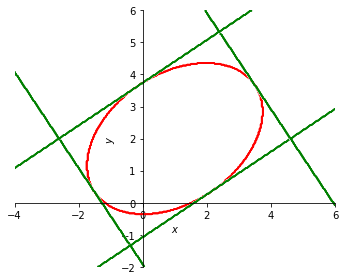

In [6]:
center = Ellipse1.center
slope=1/(3**S(1)/2)
line1 = Line(center, Point(center[0]+2, center[1]+2*slope))
x, y = symbols("x y")
eq_line1 = line1.equation(x=x, y=y)
eq_ell1 = Ellipse1.equation(x=x, y=y, _slope=slope)
y_eq1 = sympy.solve(eq_line1, y)[0]
x_1 = sympy.solve(sympy.expand(eq_ell1).subs(y, y_eq1), x)
line2 = line1.perpendicular_line(Ellipse1.center)
eq_line2 = line2.equation(x=x, y=y)
x_eq2 = sympy.solve(eq_line2, x)[0]
y_2 = sympy.solve(sympy.expand(eq_ell1).subs(x, x_eq2), y)
points1 = [Point(x_1[0], y_eq1.subs(x, x_1[0])), Point(x_eq2.subs(y, y_2[0]), y_2[0]), Point(x_1[1], y_eq1.subs(x, x_1[1])), Point(x_eq2.subs(y, y_2[1]), y_2[1])]
p = plot_implicit(Ellipse1.equation(x=x, y=y, _slope = slope),
                  (x, -4, 6),
                  (y, -2, 6),
                  aspect_ratio=(1, 1),
                  line_color = 'r',
                  show=False,
                  adaptive=False)
for point in points1:
    line2 = Line(point, center).perpendicular_line(point)
    display(Eq(line2.equation(x=x,y=y), 0))
    p.extend(plot_implicit(line2.equation(x=x, y=y),
                (x, -4, 6),
                (y, -2, 6),
                aspect_ratio=(1, 1),
                line_color = 'g',
                show=False,
                adaptive=False))
p.show()

###  Индивидуальное задание

Эллипс с центром $Point2D\left(5, -1\right)$, вертикальной полуосью $2$, эксцентриситетом $5 / 6$.

Изобразить на графике эллипс, а также эллипс, повернутый на угол $\alpha = $$\pi / 3$ по часовой стрелке.

Вывести на экран центр и фокусы эллипса, длины полуосей, уравнение эллипса, вершины эллипса.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

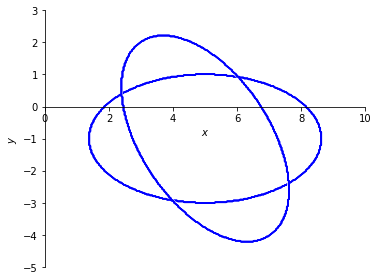

In [7]:
Ellipse0 = Ellipse(Point(5, -1), vradius=2,  eccentricity=Rational(5, 6))
line1 = Line(*Ellipse0.foci)
x, y = symbols("x y")
eq_line1 = line1.equation(x=x, y=y)
eq_ell1 = Ellipse0.equation(x=x, y=y)
y_eq1 = sympy.solve(eq_line1, y)[0]
x_1 = sympy.solve(sympy.expand(eq_ell1).subs(y, y_eq1), x)
line2 = line1.perpendicular_line(Ellipse0.center)
eq_line2 = line2.equation(x=x, y=y)
x_eq2 = sympy.solve(eq_line2, x)[0]
y_2 = sympy.solve(sympy.expand(eq_ell1).subs(x, x_eq2), y)
points0 = (Point(x_1[0], y_eq1.subs(x, x_1[0])), Point(x_eq2.subs(y, y_2[0]), y_2[0]), Point(x_1[1], y_eq1.subs(x, x_1[1])), Point(x_eq2.subs(y, y_2[1]), y_2[1]))
props = {'center': Ellipse0.center,
         'hradius': Ellipse0.hradius,
         'vradius': Ellipse0.vradius,
         'focus\_distance': Ellipse0.focus_distance,
         'foci': Ellipse0.foci,
         'points': points0}
display(*[Latex(f'{key} = {latex(props[key])}') for key in props])
expr0 = Ellipse0.equation(x=x, y=y, _slope=-(3**S(1)/2))
p = plot_implicit(Ellipse0.equation(x=x, y=y),
                  (x, 0, 10),
                  (y, -5, 3),
                  aspect_ratio=(1, 1),
                  show=False,
                  adaptive=False)
p.extend(plot_implicit(expr0,
                  (x, 0, 10),
                  (y, -5, 3),
                  aspect_ratio=(1, 1),
                  show=False,
                  adaptive=False))
p.show()